<a href="https://colab.research.google.com/github/1218muskan/DL-CV_IGDTUW/blob/main/ANN_vs_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons

## Loading the dataset

In [242]:
# make_moons : sample dataset provided by sklearn
x, y = make_moons(n_samples=500, noise=0.1)

In [ ]:
x.shape , y.shape

((500, 2), (500,))

So we have 500 records in our dataset with 2 features and 1 target variable

In [ ]:
x[:10]

array([[ 1.12542552, -0.21796809],
       [-0.54976814,  0.84251885],
       [ 0.75484003,  0.22080314],
       [ 0.81617787,  0.82408287],
       [ 1.23499879,  0.70177265],
       [-0.09030873,  0.71949791],
       [ 0.13955908,  0.84598858],
       [ 1.76218117,  0.33233907],
       [ 1.26800281, -0.66082304],
       [ 1.83159322, -0.01096685]])

In [ ]:
y[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

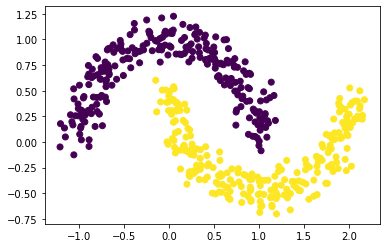

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y)  # c : color , data points are colored according to y which is target (0 or 1)
plt.show()

In [ ]:
def plot_boundary(predict):

  # plotting coloured region
  x1 = np.arange(min(x[:,0]) - 1, max(x[:,0]) + 1, step=0.01)    # Generating point for 1st column
  x2 = np.arange(min(x[:,1]) - 1, max(x[:,1]) + 1, step=0.01)    # Generating point for 2nd column

  xx, yy = np.meshgrid(x1,x2)
  arr = np.array([xx.flatten(), yy.flatten()]).T
  z = predict(arr)
  z = z.reshape(xx.shape)                                        # reshaping our prediction of coordinates so that they can be plotted
  plt.contourf(xx, yy, z, cmap=ListedColormap(('gray', 'red')))  # contourf -> f stands for fill

  # plotting actual data points
  plt.scatter(x[:,0], x[:,1], c=y)
  plt.show()

Explanation of above function :- [Here](#scrollTo=Z4WmNnvl0zKa)

## Building Different Models

- Logistic Regression
- Support Vector Machine
- Deep Learning Model

### Logistic Regression

In [ ]:
logistic = LogisticRegression()
logistic.fit(x,y)

LogisticRegression()

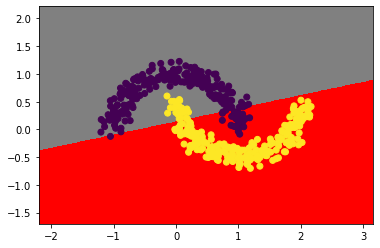

In [ ]:
plot_boundary( lambda X: logistic.predict(X))

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

y_pred = logistic.predict(x)
accuracy_score(y,y_pred)

0.882

### Support Vector Machine (SVM)

In [ ]:
svc = SVC()
svc.fit(x,y)

SVC()

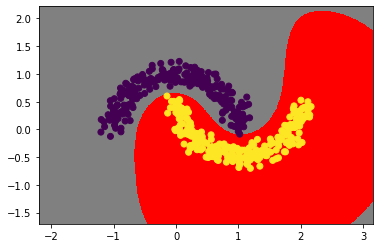

In [ ]:
plot_boundary(lambda X: svc.predict(X))

In [ ]:
y_pred = svc.predict(x)
accuracy_score(y,y_pred)

1.0

### Deep Learning

There are 2 ways:-

1. Ouput Neurons = 1<br>
Activation Function - Sigmoid<br>
We will get the actual value (target) after rounding off the ouput received btw [0,1]

2. Ouput Neurons = 2<br>
Activation Function - Softmax<br>
We will get the probability of both 0 and 1.

In [ ]:
n = len(x)
input_neurons = 2
ouput_neurons = 2
alpha = 0.01

<center><img src="https://www.oreilly.com/library/view/python-natural-language/9781787121423/assets/854e270c-fe31-4bf5-9c0a-116d5813e8c4.png" width="490" height="245" /></center>
<br> 

In [ ]:
def predict(model, X):
  wH = model['weightHidden']
  wOut = model['weightOutput']
  bH = model['biasHidden']
  bOut = model['biasOutput']

  z1 = np.dot(X, wH) + bH
  hiddenLayer = np.tanh(z1)  
    
  z2 = np.dot(hiddenLayer, wOut) + bOut
  ## Softmax activation function
  exp_scores = np.exp(z2) 
  probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

  return np.argmax(probs, axis=1)  # returning max prob row-wise

In [238]:
def buildModel(input_neurons, hidden_neurons, output_neurons, epochs, alpha):

  # Initialzing Weights
  wH = np.random.uniform(size=(input_neurons, hidden_neurons))
  wOut = np.random.uniform(size=(hidden_neurons, output_neurons))
  bH = np.random.uniform(size=(1, hidden_neurons))
  bOut = np.random.uniform(size=(1, output_neurons))

  model = {}

  for i in range(epochs):

    # Feed Forward
    z1 = np.dot(x, wH) + bH
    hiddenLayer = np.tanh(z1)  # tanh() is hyperbolic fn which gives result between -1 to 1
    
    z2 = np.dot(hiddenLayer, wOut) + bOut
    ## Softmax activation function
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)


    # Backpropagation
    ## only delta is calculated for softmax
    delta = probs
    delta[range(n), y] -= 1

    ## for tanh
    error_hidden  = delta.dot(wOut.T)
    slope_hidden = 1 - np.power(hiddenLayer,2)
    delta_hidden = error_hidden * slope_hidden


    # Optimization
    wOut = wOut - hiddenLayer.T.dot(delta) * alpha
    wH = wH - x.T.dot(delta_hidden) * alpha
    bOut = bOut - np.sum(delta, axis=0, keepdims = True) * alpha
    bH = bH - np.sum(delta_hidden, axis = 0, keepdims=True) * alpha

    model = {'weightHidden': wH , 'weightOutput': wOut, 'biasHidden': bH, 'biasOutput': bOut}
    
  return model

In [243]:
hidden_neurons = 6
epochs = 100

model = buildModel(input_neurons, hidden_neurons, ouput_neurons, epochs, alpha)

In [244]:
model

{'biasHidden': array([[-2.68813636, -1.56434681,  4.54657186,  0.32976723,  1.09610824,
         -2.96402255]]),
 'biasOutput': array([[ 1.64271671, -0.75548008]]),
 'weightHidden': array([[-1.49644051, -3.15646642, -3.48252781,  2.43942856,  2.21626509,
          4.67131165],
        [ 3.88883421,  0.62639057,  3.55071145, -6.43129802, -0.63099299,
          1.42699243]]),
 'weightOutput': array([[ 2.43193956, -1.57987135],
        [ 1.8514765 , -1.63730333],
        [ 3.50354174, -2.28053225],
        [-0.8788812 ,  1.74016896],
        [ 0.36692066,  1.2991513 ],
        [ 4.15704568, -3.25558284]])}

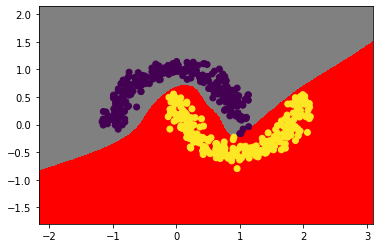

In [245]:
plot_boundary(lambda X: predict(model, X))

Now, try changing hidden layer neurons or epochs or both and see the change

## Understanding Things

### Dataset

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

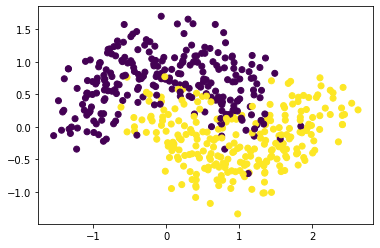

In [ ]:
x, y = make_moons(n_samples=500, noise=0.3)

plt.scatter(x[:,0], x[:,1], c=y)  
plt.show()

### Plot Boundary function

**Meshgrid** documentation : https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [ ]:
x1 = np.array([2,1,4,6,3,6,7])
x2 = np.array([1,6,3,6,8,5,3])

# Assume , x1- 1st column , x2- 2nd column

In [ ]:
xx , yy = np.meshgrid(x1, x2)

In [ ]:
xx

array([[2, 1, 4, 6, 3, 6, 7],
       [2, 1, 4, 6, 3, 6, 7],
       [2, 1, 4, 6, 3, 6, 7],
       [2, 1, 4, 6, 3, 6, 7],
       [2, 1, 4, 6, 3, 6, 7],
       [2, 1, 4, 6, 3, 6, 7],
       [2, 1, 4, 6, 3, 6, 7]])

In [ ]:
yy

array([[1, 1, 1, 1, 1, 1, 1],
       [6, 6, 6, 6, 6, 6, 6],
       [3, 3, 3, 3, 3, 3, 3],
       [6, 6, 6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8, 8, 8],
       [5, 5, 5, 5, 5, 5, 5],
       [3, 3, 3, 3, 3, 3, 3]])

In [ ]:
p = np.arange(min(x1) - 1, max(x1) + 1, step = 0.01)

In [ ]:
p.shape

# We have created 800 points btw [min(1st col) - 1,  max(1st col) + 1] 
# with 0.01 difference btw each of them, bcoz we have to fill the graph 

(800,)

In [ ]:
# Similarly, creating such points for 2nd column
q = np.arange(min(x2) - 1, max(x2) + 1, step = 0.01)

In [ ]:
q.shape

(900,)

In [ ]:
q[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [ ]:
pp, qq = np.meshgrid(p , q)

In [ ]:
pp.shape

(900, 800)

In [ ]:
qq.shape

(900, 800)

Now 900*800 coordinates can be created which can cover whole graph

In [ ]:
# For making predictions on these coordinates
# so that these can be passed into data

# Dimensions of dataset : (500, 2) -> 500 records, with 2 features 
 
arr = np.array([pp.flatten(), qq.flatten()]).T

In [ ]:
arr.shape

(720000, 2)

Now, this can be understood as 720000 (900*800) data records with 2 features.

Same data points, as:
- x1 -> 1st column 
- x2 -> 2nd column


Therefore, we wil make predictions on this array, to get the result (binary classification : 0 or 1) ... we will get output (0 or 1) for our coordinates as predicted by our model

```
z = predict(arr)
```

But shape of our predictions will be (720000,) , therefore we reshaped so that they can be plotted

```
z = z.reshape(pp.shape)
```




```
plt.contourf(pp, qq, z, cmap=ListedColormap(('gray', 'red')))
```


Therefore, contour plot be created with pp and qq coordinates and, classfication is contained in z according to which colors are filled



### Build Model Function

In [ ]:
A = np.array([[1,2,3], [5,3,4], [1,5,7]])

In [ ]:
A.sum()
# It will provide us the sum of total array

31

In [ ]:
A.sum(axis = 1)
# row-wise sum, but dimesnions will change

array([ 6, 12, 13])

In [ ]:
A.sum(axis=1, keepdims = True)
# Row-wise sum and dimensions will remain same

array([[ 6],
       [12],
       [13]])

In [ ]:
y = np.array([0,0,1,1,1,0,0,1])
probs = np.array([[0.6,0.4],
                  [0.11, 0.89],
                  [0.34, 0.66],
                  [0.55, 0.45],
                  [0.25, 0.75],
                  [0.47, 0.53],
                  [0.36, 0.64],
                  [0.49, 0.51]])

1st obs. - Loss: 0, 0.6<br>
2nd obs. - Loss: 0, 0.11<br>
3rd obs. - Loss: 1, 0.66<br>
... and so on

In [ ]:
probs[range(8), y] -= 1

In [ ]:
probs

array([[-0.4 ,  0.4 ],
       [-0.89,  0.89],
       [ 0.34, -0.34],
       [ 0.55, -0.55],
       [ 0.25, -0.25],
       [-0.53,  0.53],
       [-0.64,  0.64],
       [ 0.49, -0.49]])

Subtraction will be performed only on that probability which will be used to calculate the loss ( prob - 1)... i.e. which should be our actual output<br>
Loss = prob - 1,  as 1 should be the probability of correct output

- probs[0,0] -=1<br>
0th observation , actual value shld be 0, hence sub. 1 from prob of 0

- probs[1,0] -=1<br>
1st observation , actual value shld be 0, hence sub. 1 from prob of 0

- probs[2,1] -=1<br>
2nd observation , actual value shld be 1, hence sub. 1 from prob of 1<br><br>
... so on


```
delta = probs
delta[range(n),y] = delta[range(n),y] - 1
```